In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import words
import nltk
import re


In [ ]:
# Function to read the embeddings from the text file
def read_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            word = parts[0]
            vector = [float(val) for val in parts[1:]]
            embeddings[word] = vector
    return embeddings

# Convert the embeddings dictionary to a pandas DataFrame
def embeddings_to_dataframe(embeddings):
    df = pd.DataFrame.from_dict(embeddings, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['word'] + [f'dim_{i}' for i in range(1, df.shape[1])]
    return df

# File path to your embeddings file
pca_file_path = '/content/drive/MyDrive/Research files/pca_embed2.txt'

pca_embeddings = read_embeddings(pca_file_path)
df_pca = embeddings_to_dataframe(pca_embeddings)

# Display the DataFrame
print(df_pca.head())
print(df_pca.shape)


  word  dim_1  dim_2  dim_3  dim_4  dim_5  dim_6  dim_7     dim_8     dim_9  \
0    1    0.0    0.0   -0.0   -0.0    0.0   -0.0   -0.0  0.806488  0.766334   
1    0   -0.0   -0.0    0.0    0.0    0.0   -0.0    0.0 -0.538807 -0.462420   
2    2    0.0    0.0   -0.0   -0.0    0.0   -0.0    0.0  0.478869  0.490168   
3    e    0.0    0.0    0.0    0.0    0.0   -0.0   -0.0  0.107932 -1.221560   
4    4   -0.0    0.0   -0.0   -0.0   -0.0    0.0    0.0 -0.233278  0.536040   

   ...    dim_91    dim_92    dim_93    dim_94    dim_95    dim_96    dim_97  \
0  ...  0.494511  0.256361  0.275678 -0.562312 -0.105530 -0.247616  0.104793   
1  ... -0.351099 -0.256060 -0.553084  0.229841 -0.029120 -0.353814 -0.783814   
2  ...  0.407863  0.138000 -0.526537  0.039378  0.601712  0.631528  0.014260   
3  ...  0.494754  0.072564  0.240293  0.402141 -0.745550 -0.093566 -0.422362   
4  ... -0.698870 -0.136949  0.636169 -0.041754 -0.555063 -0.243242 -0.589227   

     dim_98    dim_99   dim_100  
0 -0.21276

In [ ]:
myvecs = pd.read_table("/content/drive/MyDrive/Research files/dataset_A_full_06-19-2024-17-16-15/vectors.txt", header=None, sep=' ')
df_original = pd.DataFrame(myvecs)
print(df_original.shape)
print(df_original.head(10))

(33331, 201)
     0         1         2         3         4         5         6    \
0      1  0.232049 -0.142389  0.038370 -0.338978  0.949832 -0.377340   
1      0  1.285990  0.143640  0.358840  0.376104 -0.552593 -0.269279   
2      2 -0.038684 -0.202337  1.019562  0.184688  0.925066 -1.116242   
3      e -0.048736 -0.189360  0.087168  0.692893 -0.269029 -0.681099   
4      4  0.014064 -0.283903  0.533100 -0.576573  0.680712 -0.833689   
5   gold  0.665368  0.575129 -0.233913 -0.803415  0.541873 -0.284748   
6      3 -0.053550 -0.860397  0.542432 -0.025484  1.201468 -1.302501   
7      5  0.202220  0.046589  0.666424  0.149186  0.646349 -0.951092   
8      m  0.079030 -0.147156  0.453469 -0.095771  1.074517 -0.529070   
9  mines -0.061983 -0.611545  0.075108 -1.006732  1.258891 -0.059213   

        7         8         9    ...       191       192       193       194  \
0 -0.404930 -0.237748 -0.146115  ... -0.198045 -0.110211 -0.172436 -0.710115   
1 -0.693922 -0.494884  0.290186  .

In [ ]:
# Extract embedding values as numpy arrays
original_embeddings_values = df_original.iloc[:, 1:].values
pca_embeddings_values = df_pca.iloc[:, 1:].values

**From the process that is how post processing technique is used, I supposed that it would need to inverse_transform multiple times**

In which I am wrong

loss is even more that normal pca, sheesh.

In [ ]:
import joblib
from sklearn.decomposition import PCA

# Load PCA model details for the first PCA reduction to 200 components
pca_details = joblib.load('/content/drive/MyDrive/Research files/pca_details_200to100.joblib')

# Recreate PCA object
pca_200 = PCA(n_components=200)
pca_200.components_ = pca_details['components']
pca_200.mean_ = pca_details['mean']
pca_200.explained_variance_ = pca_details['explained_variance']
pca_200.explained_variance_ratio_ = pca_details['explained_variance_ratio']

In [ ]:
# Load PCA model details
pca_details = joblib.load('/content/drive/MyDrive/Research files/pca_details_dimreduc.joblib')

# Recreate PCA object
pca_dimreduc = PCA(n_components=100)
pca_dimreduc.components_ = pca_details['components']
pca_dimreduc.mean_ = pca_details['mean']
pca_dimreduc.explained_variance_ = pca_details['explained_variance']
pca_dimreduc.explained_variance_ratio_ = pca_details['explained_variance_ratio']

In [ ]:
# Load PCA model details
pca_details = joblib.load('/content/drive/MyDrive/Research files/pca_details_post.joblib')

# Recreate PCA object
pca_post = PCA(n_components=100)
pca_post.components_ = pca_details['components']
pca_post.mean_ = pca_details['mean']
pca_post.explained_variance_ = pca_details['explained_variance']
pca_post.explained_variance_ratio_ = pca_details['explained_variance_ratio']

In [ ]:
# Perform the inverse transform to reconstruct the original data
pre_postproc_embeddings = pca_post.inverse_transform(pca_embeddings_values)
pre_dimreduc_embeddings = pca_dimreduc.inverse_transform(pre_postproc_embeddings)
reconstructed_embeddings = pca_200.inverse_transform(pre_dimreduc_embeddings)
reconstructed_embeddings.shape

(33331, 200)

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute the reconstruction error (loss)
mse_loss = mean_squared_error(original_embeddings_values, reconstructed_embeddings)
print(f'Mean Squared Error (MSE) Loss: {mse_loss}')

Mean Squared Error (MSE) Loss: 0.11017315419331031


In [ ]:
# Optionally, you can compute the loss per sample if needed
mse_loss_per_sample = mean_squared_error(original_embeddings_values, reconstructed_embeddings, multioutput='raw_values')
print(f'MSE Loss per sample: {mse_loss_per_sample}')

MSE Loss per sample: [0.11673344 0.10870606 0.11527205 0.10271265 0.12808158 0.13336606
 0.10564591 0.10062623 0.1211321  0.10268818 0.11194063 0.0946356
 0.12103155 0.11816154 0.09015499 0.13054932 0.11720578 0.09550943
 0.09418677 0.12736752 0.1156758  0.11358198 0.11389688 0.13001137
 0.09115604 0.13114226 0.12742179 0.10314221 0.08876275 0.10336809
 0.12649495 0.1167369  0.13135918 0.12002474 0.0914064  0.10750743
 0.12521363 0.10722371 0.1111771  0.09965425 0.1175552  0.12624573
 0.10519822 0.09248932 0.11484312 0.10553461 0.10474733 0.12206029
 0.11880098 0.09773422 0.088269   0.11846784 0.12151162 0.08734638
 0.1049701  0.12795063 0.10268534 0.11358037 0.12581331 0.10188533
 0.11826243 0.10808611 0.09622723 0.11519294 0.10299989 0.11281984
 0.10780884 0.1176381  0.09589203 0.09921236 0.10134096 0.10289738
 0.11156888 0.10573628 0.11083907 0.11992713 0.11323458 0.09372548
 0.09089708 0.11554437 0.14100381 0.10487511 0.11994994 0.1246478
 0.12036943 0.11242273 0.11328392 0.1246420

In [ ]:
direct_reconstructed_embeddings = pca_dimreduc.inverse_transform(pca_embeddings_values)
direct_reconstructed_embeddings.shape

(33331, 200)

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute the reconstruction error (loss)
mse_loss = mean_squared_error(original_embeddings_values, direct_reconstructed_embeddings)
print(f'Mean Squared Error (MSE) Loss: {mse_loss}')

Mean Squared Error (MSE) Loss: 0.029068608328809854


**From this point on, it will be just normal pca(nothing fancy)**

.
.
.

In [ ]:
from sklearn.decomposition import PCA

# Extract the embeddings (all columns except the first one)
original_embeddings_values = df_original.iloc[:, 1:].values

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=100)
reduced_standard_pca_embeddings = pca.fit_transform(original_embeddings_values)

# Create a DataFrame for the reduced embeddings
reduced_standard_pca_df = pd.DataFrame(reduced_standard_pca_embeddings)

In [ ]:
reduced_standard_pca_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,5.418400,-2.585303,-0.974994,1.594648,0.133537,0.295798,0.813483,-0.227030,-0.539735,0.770111,...,0.052282,0.031253,0.054663,-0.255405,-0.759474,0.365023,0.150215,0.494510,0.256360,0.275679
1,4.815095,-2.680573,-0.714340,3.209775,-0.418971,-0.165380,-0.178229,-0.129103,-0.011171,-0.748381,...,-0.190791,-0.158002,0.278293,0.676577,0.321490,-0.279216,0.181790,-0.351099,-0.256058,-0.553084
2,5.273566,-1.862561,-0.841596,1.668813,0.391054,0.337040,0.760108,-0.774342,-0.753135,0.570627,...,0.128449,0.314057,-0.516395,0.051921,-0.053737,-0.181833,-0.146517,0.407862,0.138000,-0.526536
3,4.324381,-2.350257,-0.601791,1.009474,-1.710437,2.276541,1.067202,-2.402652,0.034989,0.608010,...,0.071213,0.668885,-0.163593,0.055872,0.604793,0.135727,0.185107,0.494754,0.072564,0.240293
4,5.110363,-1.909426,-0.624203,1.530811,-0.288543,0.825764,1.000772,-1.030653,-0.263384,0.777308,...,-0.363171,0.071749,0.038337,0.681312,0.399636,0.193187,-0.634190,-0.698869,-0.136948,0.636170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33326,-0.216365,-0.568120,0.322628,0.089726,-0.191015,0.035310,-0.353016,-0.247380,-0.052693,-0.381678,...,0.018367,0.090661,0.046637,-0.014173,0.030984,0.037840,-0.040943,0.067076,-0.016275,0.077041
33327,-0.368009,-0.193998,-0.505362,-0.498685,-0.022672,0.218139,0.244700,0.262207,-0.228151,0.012105,...,0.096191,-0.019081,-0.115780,0.127326,0.064784,0.034642,-0.112885,-0.169187,-0.091635,-0.167488
33328,-0.571072,-0.025682,-0.395483,0.052099,0.601248,0.132597,-0.030031,-0.182961,-0.002041,-0.070120,...,-0.103876,-0.021138,0.037583,0.140080,0.237506,-0.073286,-0.092913,-0.045735,0.004194,0.084503
33329,-0.094695,0.417813,0.595711,-0.260039,0.156601,-0.057188,0.058989,-0.598718,0.032761,-0.012790,...,-0.008856,-0.150603,0.030069,-0.091033,-0.063464,0.052206,-0.049514,-0.008107,-0.070254,-0.291058


In [ ]:
standard_reconstruct_embeddings = pca.inverse_transform(reduced_standard_pca_embeddings)
standard_reconstruct_embeddings.shape

(33331, 200)

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute the reconstruction error (loss)
mse_loss = mean_squared_error(original_embeddings_values, standard_reconstruct_embeddings)
print(f'Mean Squared Error (MSE) Loss: {mse_loss}')

Mean Squared Error (MSE) Loss: 0.011157405935537552


**Doing the pca with split between train and test set**

and find mse together with explained variance ratio

In [ ]:
# Read the CSV file into a DataFrame
mydf_filtered = pd.read_csv('/content/drive/MyDrive/Research files/mydf_filtered.csv')

In [ ]:
mydf_filtered

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
1,mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
2,creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
3,work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
4,copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
12063,yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
12064,yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676
12065,yest,0.113457,-0.214988,0.029493,0.070235,0.015440,-0.153996,0.007843,-0.117899,-0.028560,...,0.016367,0.091974,-0.056424,0.105577,-0.001417,-0.104674,-0.058605,-0.099760,0.224277,-0.158745


In [ ]:
# Split into features (embeddings) and labels (words)
X = mydf_filtered.iloc[:, 1:]  # All columns except the first
y = mydf_filtered.iloc[:, 0]   # The first column

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PCA
pca = PCA()

# Fit PCA on the training set
pca.fit(X_train)

# Calculate explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [ ]:
# Calculate MSE for each number of principal components
mse_train_list = []
mse_test_list = []

for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    X_train_reconstructed = pca.inverse_transform(X_train_pca)
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    mse_train = mean_squared_error(X_train, X_train_reconstructed)*200
    mse_test = mean_squared_error(X_test, X_test_reconstructed)*200

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

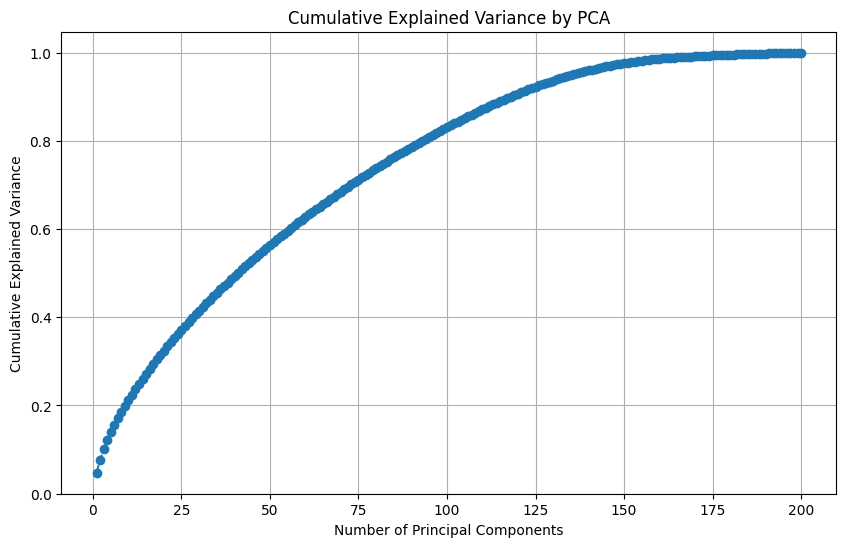

In [ ]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid()
plt.show()

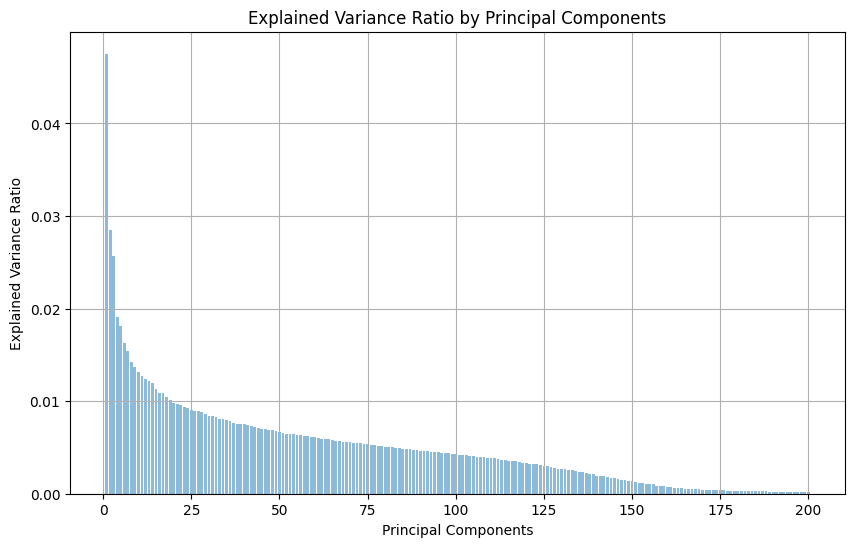

In [ ]:
# Bar plot of explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid()
plt.show()

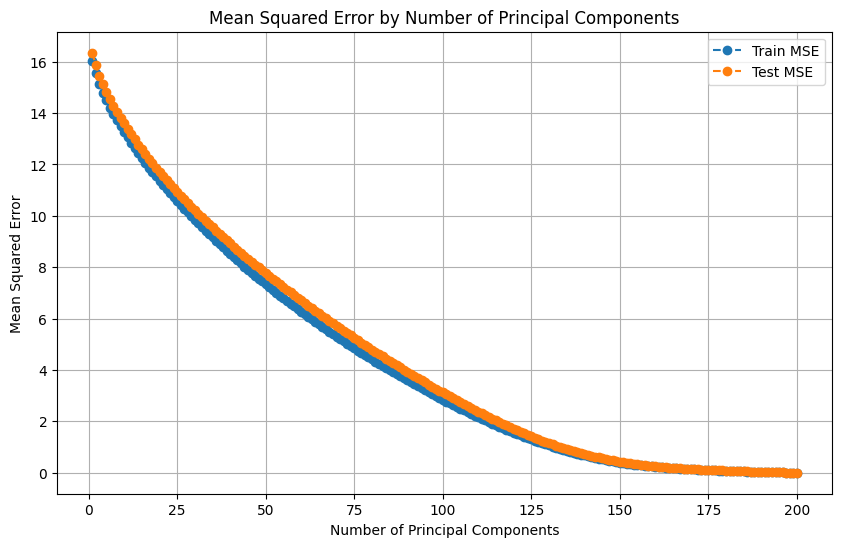

In [ ]:
# Plot MSE for train and test sets
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_train_list) + 1), mse_train_list, marker='o', linestyle='--', label='Train MSE')
plt.plot(range(1, len(mse_test_list) + 1), mse_test_list, marker='o', linestyle='--', label='Test MSE')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error by Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Display explained variance ratio as percentages
explained_variance_percentage = explained_variance_ratio * 100
print(f'Explained Variance Ratio (as percentages): {explained_variance_percentage}')


Explained Variance Ratio (as percentages): [4.7527475  2.84434327 2.56571554 1.91138032 1.81203533 1.62929014
 1.54508586 1.42204006 1.36773171 1.31763336 1.27473055 1.23748982
 1.21321975 1.19281066 1.13016873 1.09069117 1.08637412 1.04909474
 1.00931151 0.97722053 0.970024   0.95723868 0.93787417 0.92532133
 0.90575155 0.89595536 0.89180789 0.8819336  0.85895468 0.84044394
 0.83590135 0.83080138 0.8116386  0.80695916 0.79672617 0.78794267
 0.76835308 0.75801039 0.75442157 0.75076975 0.74290734 0.72753349
 0.72337848 0.71340291 0.70251177 0.69878133 0.69222765 0.68508976
 0.67513986 0.66137976 0.65211697 0.64956122 0.64094945 0.63973089
 0.62986786 0.62904449 0.62391786 0.61858594 0.61497422 0.60759254
 0.60013132 0.59334622 0.59174705 0.58687837 0.57732211 0.57131692
 0.56480625 0.56079384 0.55918312 0.55729583 0.55126595 0.54658126
 0.54378045 0.5414174  0.53541523 0.52706345 0.521457   0.5208633
 0.51533711 0.50714229 0.50696904 0.50140411 0.49693894 0.49313304
 0.4864238  0.480832

In [ ]:
# Calculate mean squared error for both the train and test sets using all components
mse_train = mean_squared_error(X_train, X_train_reconstructed)
mse_test = mean_squared_error(X_test, X_test_reconstructed)

print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')

Mean Squared Error (Train): 3.948454515813358e-31
Mean Squared Error (Test): 4.044797630103076e-31


- **Benchmarking Section**
-
- Normal PCA into 2 dimension
-



In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the CSV file into a DataFrame
mydf_filtered = pd.read_csv('/content/drive/MyDrive/Research files/mydf_filtered.csv')
mydf_filtered

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
1,mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
2,creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
3,work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
4,copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
12063,yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
12064,yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676
12065,yest,0.113457,-0.214988,0.029493,0.070235,0.015440,-0.153996,0.007843,-0.117899,-0.028560,...,0.016367,0.091974,-0.056424,0.105577,-0.001417,-0.104674,-0.058605,-0.099760,0.224277,-0.158745


In [ ]:
words = mydf_filtered.iloc[:, 0]  # First column (words)
vectors = mydf_filtered.iloc[:, 1:]  # Remaining columns (200-dimensional vectors)

In [ ]:

# Convert your vectors to a PyTorch tensor
vectors_tensor = torch.tensor(vectors.values, dtype=torch.float32)

# Step 1: Center the data (mean normalization)
vectors_mean = torch.mean(vectors_tensor, dim=0)
centered_vectors = vectors_tensor - vectors_mean

# Step 2: Perform SVD to get PCA components
U, S, V = torch.svd(centered_vectors)

# This var specify the latent dimension. Change for other dimensional change
V_k = V[:, :2]

# Step 3: Reduce the dimensionality
# Multiply by the first two singular vectors (PCs)
reduced_vectors_torch = torch.matmul(centered_vectors, V_k)

In [ ]:
reduced_vectors_torch

tensor([[-4.9332,  1.1202],
        [-4.4128,  3.1585],
        [-4.7678,  1.7186],
        ...,
        [-0.2241,  0.1460],
        [ 0.3298, -0.0219],
        [ 0.6142,  0.0084]])

In [ ]:
# Convert the reduced vectors to a NumPy array
reduced_vectors_np = reduced_vectors_torch.detach().numpy()

# Create a DataFrame from the reduced vectors
reduced_df = pd.DataFrame(reduced_vectors_np, columns=[f'PC{i+1}' for i in range(reduced_vectors_np.shape[1])])

reduced_df

,PC1,PC2
0,-4.933172,1.120176
1,-4.412772,3.158489
2,-4.767795,1.718639
3,-4.985589,1.005441
4,-4.697652,1.020338
...,...,...
12062,0.669161,-0.234916
12063,0.387428,-0.486247
12064,-0.224101,0.145985
12065,0.329758,-0.021927


In [ ]:
# # Add the words as the first column
# reduced_df.insert(0, 'Word', words.values)

# # Save to CSV file
# reduced_df.to_csv('/content/drive/MyDrive/Research files/PCA_reduced_data.csv', index=False)

In [ ]:
# Step 4: Reconstruct the original embeddings using the top 2 principal components
reconstructed_vectors_torch = torch.matmul(reduced_vectors_torch, V_k.T) + vectors_mean
reconstructed_vectors_torch

tensor([[ 0.4776, -0.2892,  0.4307,  ..., -0.2369,  0.3332,  0.1775],
        [ 0.1489, -0.3653,  0.3653,  ..., -0.3259,  0.4596,  0.1093],
        [ 0.3794, -0.3109,  0.4104,  ..., -0.2625,  0.3696,  0.1569],
        ...,
        [-0.0166, -0.0028,  0.0219,  ...,  0.0181, -0.0037, -0.0006],
        [-0.0679,  0.0336, -0.0257,  ...,  0.0510, -0.0474, -0.0203],
        [-0.1091,  0.0464, -0.0512,  ...,  0.0615, -0.0610, -0.0331]])

In [ ]:
len(vectors_tensor)

12067

In [ ]:
# Step 5: Calculate MSE loss using PyTorch
mse_loss_torch = torch.nn.functional.mse_loss(reconstructed_vectors_torch, vectors_tensor, reduction = 'sum')
mse_loss_torch = mse_loss_torch / len(vectors_tensor)
print("MSE Loss (PyTorch):", mse_loss_torch.item())

MSE Loss (PyTorch): 15.608331680297852


In [ ]:
# Step 5: Calculate MSE loss using PyTorch
mse_loss_torch = torch.nn.functional.mse_loss(reconstructed_vectors_torch, vectors_tensor, reduction = 'mean')
# mse_loss_torch = mse_loss_torch / len(vectors_tensor)
print("MSE Loss (PyTorch):", mse_loss_torch.item())

MSE Loss (PyTorch): 0.07804165780544281


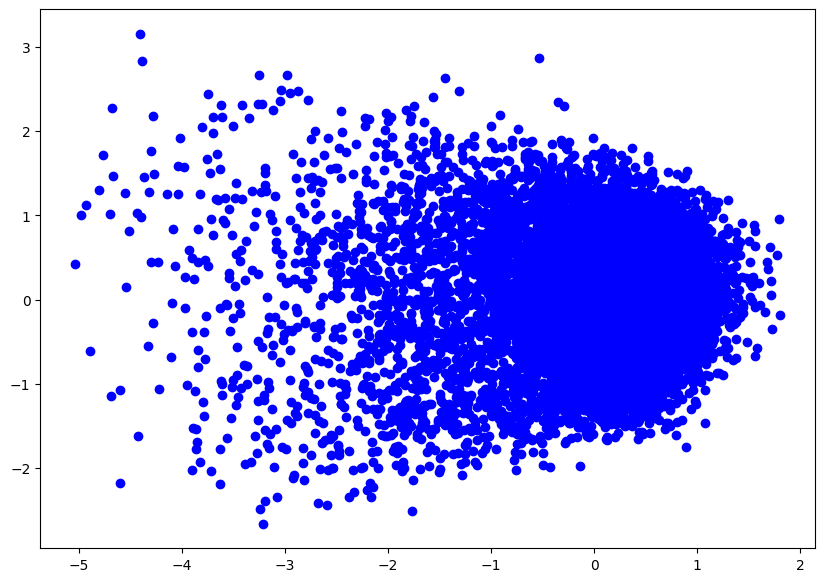

In [ ]:
# Visualizing PCA in 2D
reduced_vectors_np = reduced_vectors_torch.detach().numpy()
plt.figure(figsize=(10, 7))
plt.scatter(reduced_vectors_np[:, 0], reduced_vectors_np[:, 1], color='blue')

In [ ]:
# Load your DataFrame
cities_df = pd.read_csv('/content/drive/MyDrive/Research files/worldcities.csv')
cities_df['city'] = cities_df['city'].str.lower()

city_names = cities_df['city'].values

cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,san rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [ ]:
len(reduced_vectors_np)

12067

In [ ]:
city_words = words[words.isin(city_names)]
city_words

,0
0,gold
9,coal
30,columbia
38,vancouver
71,street
...,...
11916,shiloh
11977,takahashi
12017,una
12045,wald


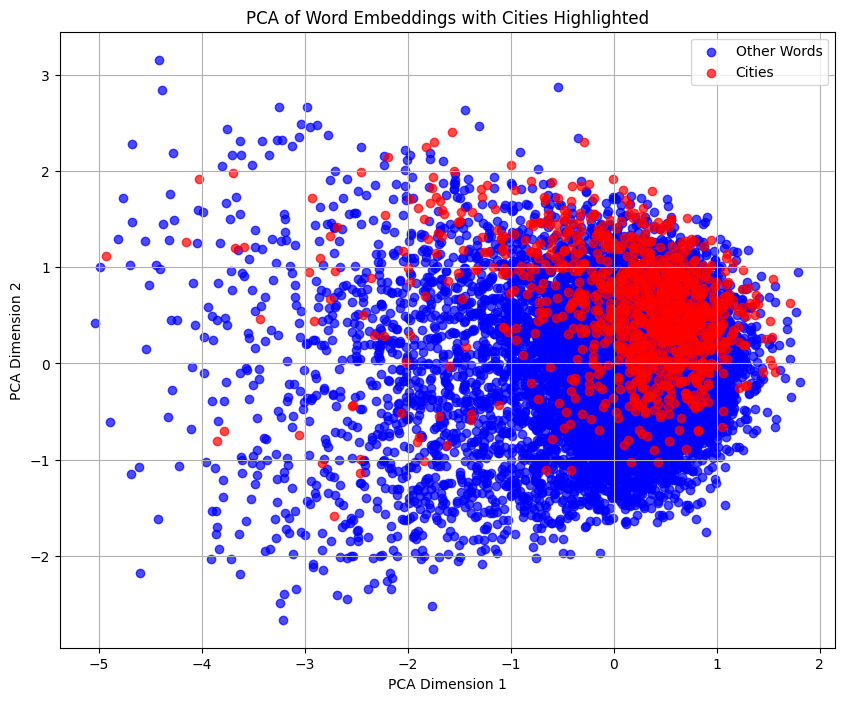

In [ ]:
# Step 2: Create a boolean mask for common cities
mask = words.isin(city_words)

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 8))

# Plot other words in blue
plt.scatter(reduced_vectors_np[~mask, 0], reduced_vectors_np[~mask, 1], color='blue', label='Other Words', alpha=0.7)

# Plot city names in red
plt.scatter(reduced_vectors_np[mask, 0], reduced_vectors_np[mask, 1], color='red', label='Cities', alpha=0.7)
# # Step 4: Annotate the city names
# for i, word in enumerate(words):
#     if word in city_words.values:  # Ensure you're only annotating city names
#         plt.annotate(word, (reduced_vectors_np[i, 0], reduced_vectors_np[i, 1]), color='red', fontsize=8)

# Step 5: Customize the plot
plt.title('PCA of Word Embeddings with Cities Highlighted')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()